In [54]:
import pandas as pd
data = pd.read_csv('dataset_SCL.csv')
data.head()

/home/lorena/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


#  1) ¿Cómo se distribuyen los datos?

## Reconocimiento y limpieza de datos 

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 2) Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 

### temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.



In [56]:
import numpy as np

data['temporada_alta'] = np.where(((data['Fecha-I'] < '2017-03-04') & (data['Fecha-I'] >= '2017-01-01')) |
                                  ((data['Fecha-I'] < '2017-08-01') & (data['Fecha-I'] >= '2017-07-15')) |
                                  ((data['Fecha-I'] < '2017-10-01') & (data['Fecha-I'] >= '2017-09-11')) |
                                  ((data['Fecha-I'] < '2018-01-01') & (data['Fecha-I'] >= '2017-12-15')),1,0)
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1


### dif_min : diferencia en minutos entre Fecha-O y Fecha-I

In [57]:
data['Fecha-O']=pd.DataFrame(data['Fecha-O'])
data['Fecha-O']= pd.to_datetime(data['Fecha-O'])
data['Fecha-I']=pd.DataFrame(data['Fecha-I'])
data['Fecha-I']= pd.to_datetime(data['Fecha-I'])
data['dif_min'] = (data['Fecha-O']- data['Fecha-I'])
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,0 days 00:03:00
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,0 days 00:09:00
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,0 days 00:09:00
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,0 days 00:03:00
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-1 days +23:58:00


### atraso_15 : 1 si dif_min > 15, 0 si no.

In [58]:
data['atraso_15'] = np.where(data['dif_min'].dt.seconds/60. > 15, 1,0)
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,0 days 00:03:00,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,0 days 00:09:00,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,0 days 00:09:00,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,0 days 00:03:00,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-1 days +23:58:00,1


### periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [59]:
import datetime

data['periodo_dia'] = np.where( (data['Fecha-I'].dt.time > datetime.time(5,0,0)) & (data['Fecha-I'].dt.time < datetime.time(12,0,0)) , 'mañana', '')
        
ntarde = np.where( (data['Fecha-I'].dt.time > datetime.time(12,0,0)) & (data['Fecha-I'].dt.time < datetime.time(18,0,0)))
nnoche = np.where( (data['Fecha-I'].dt.time > datetime.time(18,0,0)) | ((data['Fecha-I'].dt.time > datetime.time(0,0,0) )& (data['Fecha-I'].dt.time < datetime.time(4,59,59)))) 
for i in ntarde:
    data.loc[i, 'periodo_dia'] = 'tarde'
for i in nnoche:
    data.loc[i, 'periodo_dia'] = 'noche'
print(data.head())
data.to_csv('synthetic_features.csv')


              Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta           di

## 3 ) ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

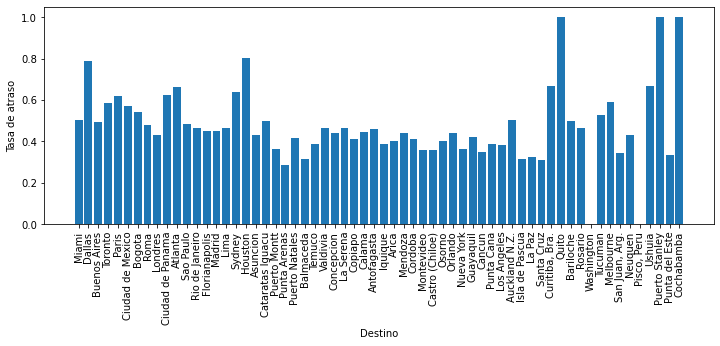

In [79]:
import matplotlib.pyplot as plt
data = pd.read_csv('synthetic_features.csv')
variables = data['SIGLADES'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['SIGLADES'] == str(i)]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
#print(des,tasa)
fig = plt.figure(figsize = (12,4))

plt.bar(var, tasa)
plt.xlabel('Destino')
plt.ylabel('Tasa de atraso')
plt.xticks(rotation='vertical')

plt.show()

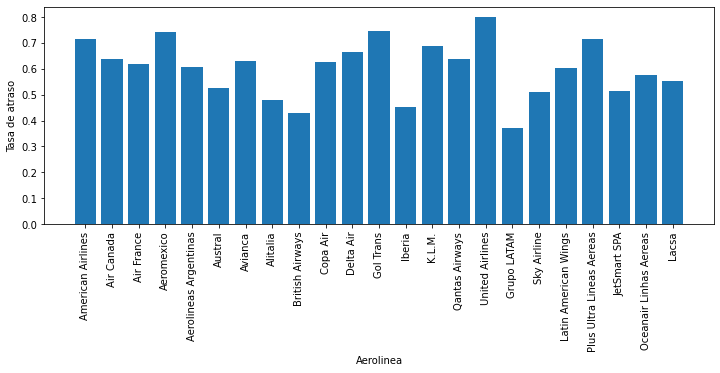

In [83]:
variables = data['OPERA'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['OPERA'] == str(i)]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)

fig = plt.figure(figsize = (12,4))

plt.bar(var, tasa)
plt.xlabel('Aerolinea')
plt.ylabel('Tasa de atraso')
plt.xticks(rotation='vertical')
plt.show()

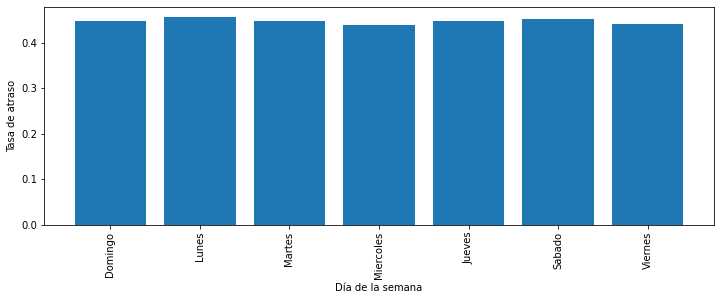

In [85]:
variables = data['DIANOM'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['DIANOM'] == str(i)]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
#print(des,tasa)
fig = plt.figure(figsize = (12,4))

plt.bar(var, tasa)
plt.xlabel('Día de la semana')
plt.ylabel('Tasa de atraso')
plt.xticks(rotation='vertical')
plt.show()

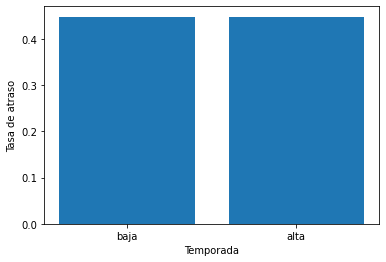

In [96]:
variables = data['temporada_alta'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['temporada_alta'] == i]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
#print(des,tasa)
fig = plt.figure(figsize = (6,4))

plt.bar(var, tasa)
plt.xlabel('Temporada')
plt.ylabel('Tasa de atraso')
plt.xticks([1,0], ['alta','baja'])
#plt.xticks(['alta','baja'],rotation='vertical')
plt.show()

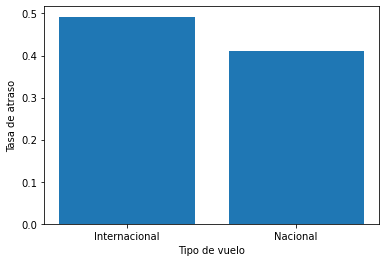

In [99]:
variables = data['TIPOVUELO'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['TIPOVUELO'] == i]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
#print(des,tasa)
fig = plt.figure(figsize = (6,4))

plt.bar(var, tasa)
plt.xlabel('Tipo de vuelo')
plt.ylabel('Tasa de atraso')
plt.xticks([1,0], ['Nacional','Internacional'])
#plt.xticks(['alta','baja'],rotation='vertical')
plt.show()

### ¿Qué variables esperarías que más influyeran en predecir atrasos?